In [20]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.model_selection import train_test_split

from code.util import *

# MLP w/ Engineered Features

In [29]:
batch_size = 128
num_classes = 2
epochs = 100

In [3]:
x = load("data/largefiles/x_feat.pkl")
y = load("data/largefiles/y_onehot.pkl")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [5]:
print(x.shape, y.shape)

(127284, 50) (127284, 2)


In [30]:
mlp_input = Input((50, ))
H = Dense(50, activation="tanh")(mlp_input)
H = Dropout(0.1)(H)
H = Dense(50, activation="tanh")(H)
H = Dropout(0.1)(H)
mlp_output = Dense(num_classes, activation="softmax")(H)

mlp_model = Model(inputs=mlp_input, outputs=mlp_output)
mlp_model.summary()

mlp_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 102       
Total params: 5,202
Trainable params: 5,202
Non-trainable params: 0
_________________________________________________________

In [31]:
history = mlp_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

score = mlp_model.evaluate(x_test, y_test, verbose=0)

Train on 89098 samples, validate on 38186 samples
Epoch 1/100
89098/89098 [==============================] - 1s 13us/sample - loss: 0.2211 - accuracy: 0.9161 - val_loss: 0.1509 - val_accuracy: 0.9475
Epoch 2/100
89098/89098 [==============================] - 1s 10us/sample - loss: 0.1545 - accuracy: 0.9452 - val_loss: 0.1468 - val_accuracy: 0.9477
Epoch 3/100
89098/89098 [==============================] - 1s 10us/sample - loss: 0.1498 - accuracy: 0.9470 - val_loss: 0.1543 - val_accuracy: 0.9451
Epoch 4/100
89098/89098 [==============================] - 1s 10us/sample - loss: 0.1488 - accuracy: 0.9474 - val_loss: 0.1429 - val_accuracy: 0.9498
Epoch 5/100
89098/89098 [==============================] - 1s 10us/sample - loss: 0.1448 - accuracy: 0.9492 - val_loss: 0.1453 - val_accuracy: 0.9490
Epoch 6/100
89098/89098 [==============================] - 1s 10us/sample - loss: 0.1437 - accuracy: 0.9493 - val_loss: 0.1543 - val_accuracy: 0.9443
Epoch 7/100
89098/89098 [=========================

89098/89098 [==============================] - 1s 9us/sample - loss: 0.1236 - accuracy: 0.9575 - val_loss: 0.1268 - val_accuracy: 0.9559
Epoch 56/100
89098/89098 [==============================] - 1s 10us/sample - loss: 0.1251 - accuracy: 0.9567 - val_loss: 0.1246 - val_accuracy: 0.9568
Epoch 57/100
89098/89098 [==============================] - 1s 10us/sample - loss: 0.1236 - accuracy: 0.9574 - val_loss: 0.1254 - val_accuracy: 0.9561
Epoch 58/100
89098/89098 [==============================] - 1s 9us/sample - loss: 0.1244 - accuracy: 0.9570 - val_loss: 0.1288 - val_accuracy: 0.9563
Epoch 59/100
89098/89098 [==============================] - 1s 10us/sample - loss: 0.1240 - accuracy: 0.9574 - val_loss: 0.1264 - val_accuracy: 0.9564
Epoch 60/100
89098/89098 [==============================] - 1s 9us/sample - loss: 0.1238 - accuracy: 0.9570 - val_loss: 0.1251 - val_accuracy: 0.9568
Epoch 61/100
89098/89098 [==============================] - 1s 9us/sample - loss: 0.1232 - accuracy: 0.9572 - 

In [32]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12351106878867389
Test accuracy: 0.9574713


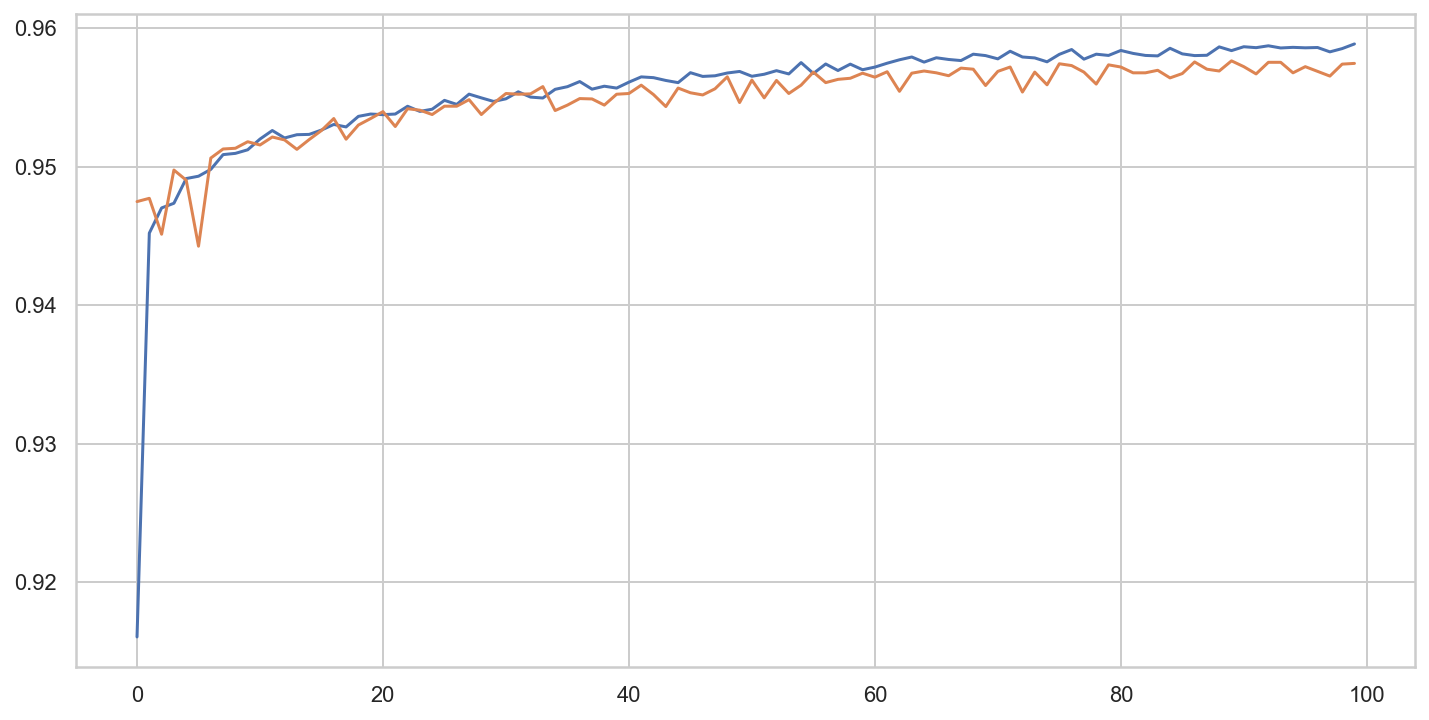

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()